In [3]:
import pandas as pd
dataset = pd.read_csv('covid_19_indonesia_time_series_all.csv')
print(dataset.dtypes)
print('Ukuran dataset : %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas')
dataset.head()

Date                            object
Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population               

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,106.836118,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,106.836118,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,107.603708,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,2,8,...,101.805109,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN


In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%m/%d/%Y')
print(dataset.dtypes)

Date                           datetime64[ns]
Location ISO Code                      object
Location                               object
New Cases                               int64
New Deaths                              int64
New Recovered                           int64
New Active Cases                        int64
Total Cases                             int64
Total Deaths                            int64
Total Recovered                         int64
Total Active Cases                      int64
Location Level                         object
City or Regency                       float64
Province                               object
Country                                object
Continent                              object
Island                                 object
Time Zone                              object
Special Status                         object
Total Regencies                         int64
Total Cities                          float64
Total Districts                   

In [5]:
dataset['Date'] = dataset['Date'].astype(str)

In [27]:
import datetime
dataset['Date_Month'] = dataset['Date'].apply(lambda x:
datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Date_Month
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN,2020-03
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0,2020-03
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN,2020-03
3,2020-03-02,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN,2020-03
4,2020-03-02,ID-RI,Riau,1,0,0,1,2,2,8,...,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN,2020-03


In [28]:
monthly_case = dataset.groupby('Date_Month')['New Cases'].sum().reset_index()
print(monthly_case)

   Date_Month  New Cases
0     2020-03       2471
1     2020-04      17068
2     2020-05      32575
3     2020-06      59533
4     2020-07     104024
5     2020-08     132868
6     2020-09     224524
7     2020-10     246414
8     2020-11     257684
9     2020-12     408857
10    2021-01     670101
11    2021-02     512515
12    2021-03     322903


In [52]:
dataset_january_2021 = dataset[(dataset['Location']!='Indonesia') & (dataset['Date_Month'] == '2021-01')]
print(dataset_january_2021)

             Date Location ISO Code           Location  New Cases  New Deaths  \
9969   2021-01-01             ID-AC               Aceh          7           0   
9970   2021-01-01             ID-BA               Bali        101           1   
9971   2021-01-01             ID-BT             Banten        287           1   
9972   2021-01-01             ID-BE           Bengkulu         68           5   
9973   2021-01-01             ID-JK        DKI Jakarta       1956          20   
...           ...               ...                ...        ...         ...   
11049  2021-01-31             ID-SG  Sulawesi Tenggara         58           0   
11050  2021-01-31             ID-SA     Sulawesi Utara         95           6   
11051  2021-01-31             ID-SB     Sumatera Barat         87           2   
11052  2021-01-31             ID-SS   Sumatera Selatan         80           3   
11053  2021-01-31             ID-SU     Sumatera Utara         91           1   

       New Recovered  New A

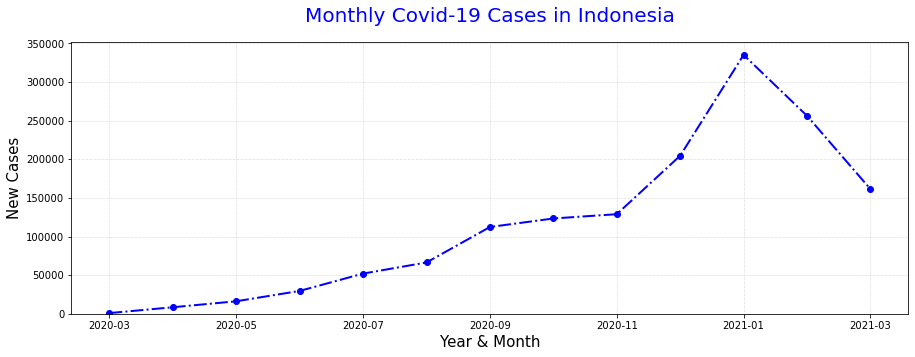

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset[dataset['Location']!='Indonesia'].groupby(['Date_Month'])['New Cases'].sum().plot(color='blue', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly Covid-19 Cases in Indonesia', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Year & Month', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()

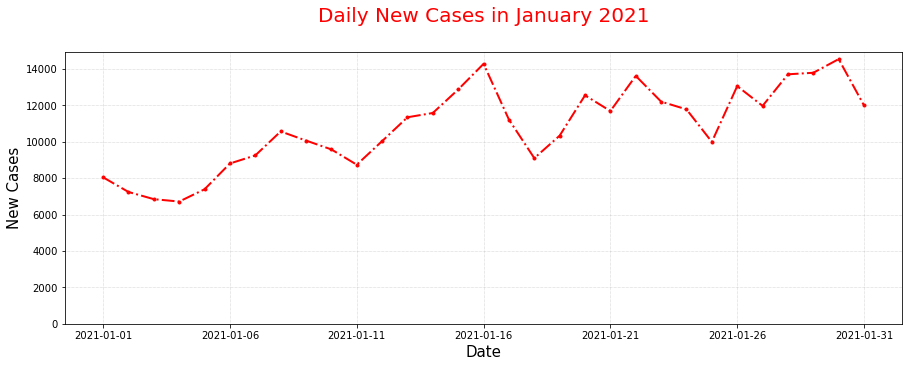

In [71]:
plt.figure(figsize=(15, 5))
dataset_january_2021.groupby(['Date'])['New Cases'].sum().plot(color='red', linestyle='-.', marker='.', linewidth=2)
plt.title('Daily New Cases in January 2021', loc='center', pad=30, fontsize=20, color='red')
plt.xlabel('Date', fontsize=15, color='black')
plt.ylabel('New Cases', fontsize=15, color='black')
plt.ylim(ymin=0)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

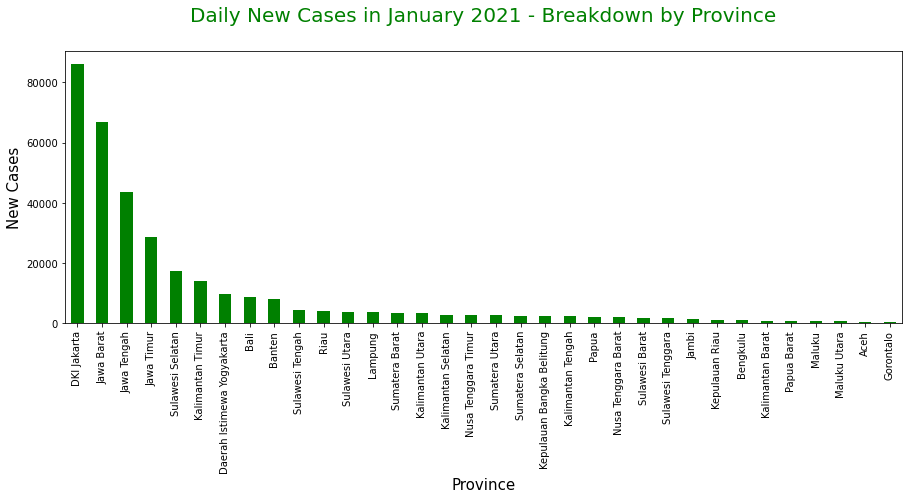

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.clf()
dataset_january_2021.groupby('Location')['New Cases'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Daily New Cases in January 2021 - Breakdown by Province',loc='center',pad=30,fontsize=20, color='green')
plt.xlabel('Province', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.ylim(ymin=0)
plt.show()